**Data Exploration**

# Imports and Loading Data 

In [94]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for visualisation
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


# Default plotting parameters
font = {'size'   : 18}
plt.rc('font', **font)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load training dataset
base_dir = "/content/drive/My Drive/SML Group Practical/Data/" #works for Kyla's drive
y_train = pd.read_csv(base_dir + 'y_train.csv', index_col = 0, squeeze = True)
X_train = pd.read_csv(base_dir + 'X_train.csv', index_col = 0, header=[0, 1, 2])
X_test = pd.read_csv(base_dir + 'X_test.csv', index_col = 0, header=[0, 1, 2])

#Create version with them together
Xy = pd.concat([X_train, y_train], axis = 1)

#scaled version
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

Working with MultiIndex

In [ ]:
#code to access data just for a certain features
features = X_train.keys().get_level_values(0).unique()
statistics = X_train.keys().get_level_values(1).unique()

#can access like this
feature_data = X_train.loc[:, X_train.keys().get_level_values(0) == features[3]]
X_train.keys().get_level_values(2).unique() #max # of windows is 20


Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='number')

Basic Data Attributes

In [ ]:
print(X_train.shape)  #shape
print(X_test.shape)  #shape
print(y_train.unique())
print("Missing:", np.sum(X_train.isna().sum())) #no missing values
print(y_train.value_counts()) #check whether classes balanced
print("Number of overall features:", len(features))
print("Number of summary statistics per feature:", len(statistics))
print("Number of windows varies by feature")
#pretty sure they each have the same 7 summary stat but just don't all have same size window


(6000, 518)
(2000, 518)
['Electronic' 'Rock' 'Instrumental' 'Hip-Hop' 'Pop' 'Experimental' 'Folk'
 'International']
Missing: 0
Folk             775
Electronic       767
Instrumental     759
Pop              758
Experimental     739
Rock             737
Hip-Hop          734
International    731
Name: Genre, dtype: int64
Number of overall features: 11
Number of summary statistics per feature: 7
Number of windows varies by feature


# Overall Summary Statistics (not by group)

Feature Means

Text(0, 0.5, 'Mean')

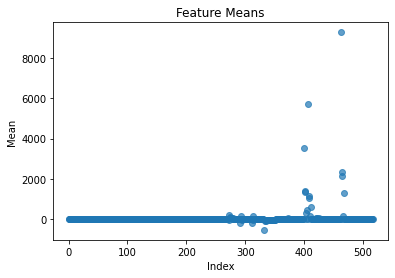

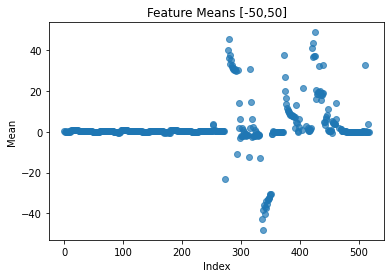

In [ ]:
#Means
X_means = X_train.mean()

plt.scatter(np.arange(0,518),X_means, alpha = .7)
plt.title("Feature Means")
plt.xlabel("Index")
plt.ylabel("Mean")

plt.figure()
X_means2 = X_means.copy()
X_means2[X_means > 50] = np.NaN #get rid of extreme values  for plotting purposes
X_means2[X_means < -50] = np.NaN 
plt.scatter(np.arange(0,len(X_means2)),X_means2, alpha = .7)
plt.title("Feature Means [-50,50]")
plt.xlabel("Index")
plt.ylabel("Mean")


Feature Variances

In [89]:
#Standard Deviations

X_sd = X_train.std()

#minima and maxima
X_sd.iloc[X_sd.argmin()]
X_sd.iloc[X_sd.argmax()]  
print("Highest Var: ", X_sd.keys()[X_sd.argmax()], X_sd[X_sd.argmax()])
print("Lowest Var: ", X_sd.keys()[X_sd.argmin()], X_sd[X_sd.argmin()])

#function to plot variances below some cut-off
def feature_var(X_sd, cut, plot = True):
    X_sd2 = X_sd.copy()
    X_sd2[X_sd2 > cut] = 0 #set those not interested in to 0
    n_under = sum(X_sd2 > 0)
    #X_sd_cut = X_sd[X_sd <= cut]
    if plot == True:
        plt.figure()
        plt.bar(np.arange(0,len(X_sd2)), X_sd2)
        plt.title(str(n_under) + " features with standard deviation < " + str(np.round(cut,3)),
                  pad = 15, fontweight = 'bold')
        plt.xlabel("Feature Index")
        plt.ylabel("Standard Deviation")
    return(n_under)

#Summary of distribution of variances of features
print("Number of features:", len(X_sd))
print("Features with sd <= 1000:" , feature_var(X_sd, 1000, plot = False))
print("Features with sd <= 100:" , feature_var(X_sd, 100, plot = False))
print("Features with sd <= 10:", feature_var(X_sd, 10, plot = False))
print("Features with sd <= 1:", feature_var(X_sd, 1, plot = False))
print("Features with sd <= .1:", feature_var(X_sd, .1, plot = False)) 
print("Features with sd <= .01:", feature_var(X_sd, .01, plot = False))
print("Features with sd <= .001:", feature_var(X_sd, .001, plot = False))

Highest Var:  ('spectral_rolloff', 'median', '01') 1238.4817877618298
Lowest Var:  ('chroma_stft', 'max', '08') 0.000818524263247622
Number of features: 518
Features with sd <= 1000: 515
Features with sd <= 100: 503
Features with sd <= 10: 457
Features with sd <= 1: 306
Features with sd <= .1: 165
Features with sd <= .01: 28
Features with sd <= .001: 1


Text(0.5, 1.0, 'Least Variable Feature (sd = 0.0008)')

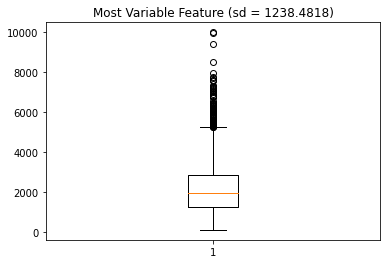

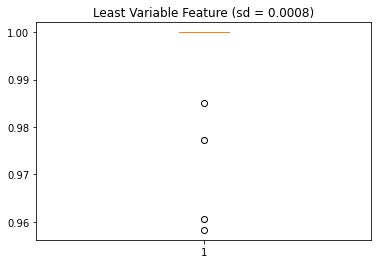

In [ ]:
#can't do box plots for all of them... explore just the highest variance ones
plt.figure()
plt.boxplot(X_train.iloc[:,X_sd.argmax()]) 
plt.title("Most Variable Feature (sd = " + str( np.round(np.max(X_sd),4)) + ")")

plt.figure()
plt.boxplot(X_train.iloc[:,X_sd.argmin()])
plt.title("Least Variable Feature (sd = " + str( np.round(np.min(X_sd),4)) + ")")

Correlation Plots

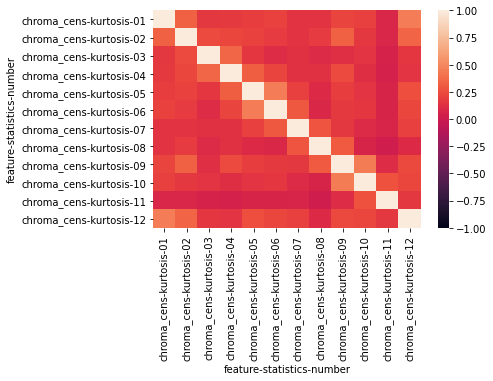

In [ ]:
#correlation within one of the windows not huge 
#perhaps slightly higher around diagonal aka adjacent windows more correlated
plt.figure()
ex1 = X_train[X_train.keys()[0:12]]
corr1 = ex1.corr()
sns.heatmap(corr1, vmin = -1, vmax = 1)

#plt.figure()
#ex2 = X_train[X_train.keys()[0:84]]
#corr2 = ex2.corr()
#sns.heatmap(corr2, vmin = -1, vmax = 1)
#plt.xticks(np.arange(6,84-5, 12), ["Kurtosis","Max","Mean","Median","Min","Skew", "Std"])
#plt.yticks(np.arange(6,84-5, 12), ["Kurtosis","Max","Mean","Median","Min","Skew", "Std"])
#plt.xlabel("Chroma_Sens")
#plt.ylabel("Chroma_Sens")

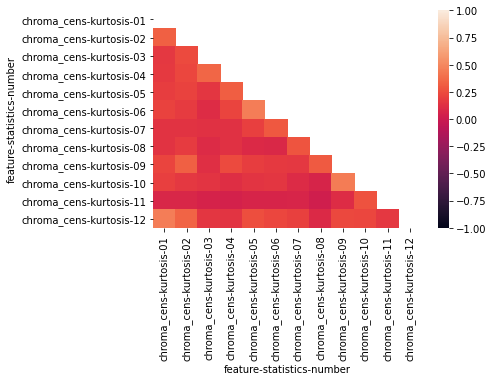

In [ ]:
#same plot as above with diagonal suppressed not actually sure this is easier to read
plt.figure()
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr1, vmin = -1, vmax = 1, mask = mask)

Correlation plots for all the windows for a single feature

In [72]:
plt.rcParams['figure.dpi'] = 80 #make plot larger

#code to access data just for a certain feature
features = list(X_train.keys().get_level_values(0).unique())
#features.index("chroma_cens")

#note: labeling still assumes 12 windows per feature
#may need to be adjusted for some features where this isn't true
def corr_plot_feature(feature, mask = False):
  feature_data = X_train.loc[:, X_train.keys().get_level_values(0) == feature]

  #figure out how large windows are for that feature
  max_int = np.max(feature_data.keys().get_level_values(2).astype(np.float))
  value_range = np.arange(max_int/2,7*max_int - max_int/2 + 1, max_int)
  
  #correlation matrix
  corr_mat = feature_data.corr()
  m = np.zeros_like(corr_mat)
  if mask == True:
    m[np.triu_indices_from(m)] = True

  plt.figure()
  sns.heatmap(corr_mat, vmin = -1, vmax = 1, mask = m)
  plt.xticks(value_range, ["Kurtosis","Max","Mean","Median","Min","Skew", "Std"])
  plt.yticks(value_range, ["Kurtosis","Max","Mean","Median","Min","Skew", "Std"])
  plt.title("'" + str(feature) + 
            "' summary statistic correlations over all windows",
            loc = "center",
            fontsize= 10,
            fontweight = 'bold',
            pad = 15)
  plt.xlabel(feature + " features")
  plt.ylabel(feature + " features")

## code to view all heat maps
#for i in np.arange(0,11):
#  corr_plot_feature(features[i], mask = True)

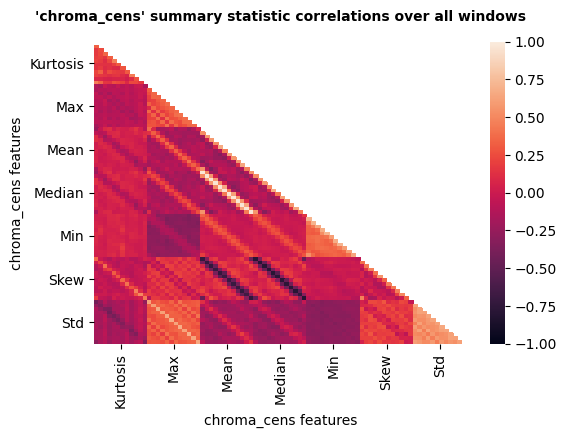

In [74]:
plt.rcParams['figure.dpi'] = 100 #adjust plot size

corr_plot_feature(features[0], mask = True)

Observations:

* For each feature,summary statistics from the same window and from adjacent windows are slightly to moderately correlated, with mean and median highly correlated. This is what the lighter or darker bands on the diagonal indicate.  



Are scale differences across features?
Yes
*  'mfcc' has extreme low values
* 'spectral bandwidth, spectral centroid, spectral rolloff, and zcr are responsible for all the > 1000 values

In [ ]:
  #function to calculate the min/max values across all n observations
  #within one feature and summary statistic

  features = X_train.keys().get_level_values(0).unique()
  stats = X_train.keys().get_level_values(1).unique()

  def feature_stat_minmax(feature, stat):
      feature_data = X_train.loc[:, X_train.keys().get_level_values(0) == feature]
      feature_data = feature_data.loc[:, feature_data.keys().get_level_values(1) == stat]
      return([feature, stat, np.min(np.min(feature_data)), np.max(np.max(feature_data))])

print("Max")
for elem in features:
    print(feature_stat_minmax(elem, "max"))

print("Mean")
for elem in features:
    print(feature_stat_minmax(elem, "mean"))


Max
['chroma_cens', 'max', 0.11391410232, 0.97948545218]
['chroma_cqt', 'max', 0.53895705938, 1.0]
['chroma_stft', 'max', 0.49275660515, 1.0]
['mfcc', 'max', -956.08337402, 313.34213257]
['rmse', 'max', 0.00028407623176, 35.408035278]
['spectral_bandwidth', 'max', 827.70544434, 5075.3447266]
['spectral_centroid', 'max', 664.51519775, 9586.9179688]
['spectral_contrast', 'max', 18.437942505, 90.76879882799999]
['spectral_rolloff', 'max', 1098.1933594, 11025.0]
['tonnetz', 'max', -0.038413923234, 0.86146843433]
['zcr', 'max', 0.03271484375, 0.99853515625]
Mean
['chroma_cens', 'mean', 0.0006741465185799999, 0.70590621233]
['chroma_cqt', 'mean', 0.059759229422, 0.99777710438]
['chroma_stft', 'mean', 0.027920184657, 0.99896758795]
['mfcc', 'mean', -985.11358643, 268.769104]
['rmse', 'mean', 0.00024603589554, 21.608154297]
['spectral_bandwidth', 'mean', 241.75485229, 3789.371582]
['spectral_centroid', 'mean', 140.75430298, 5575.1079101999985]
['spectral_contrast', 'mean', 8.141793251000001, 4


# Group Level Summary Statistics

In [ ]:
Xy_group = Xy.groupby(['Genre'])
Xy_gmeans = Xy_group.mean() #mean of each variable for each genre 
Xy_gvars = Xy_group.var() #variance of each variable for each genre
Xy_gmeans_var = Xy_gmeans.var() #variance of means across genre for each variable

In [ ]:
#select group means within a certain range
col_filter = np.logical_and(np.max(Xy_gmeans) < 100, np.max(Xy_gmeans) > -100)
Xy_gmeans2 = Xy_gmeans[col_filter.index[col_filter]] 

A not-very-informative-plot... hard to visualize the group means in a meaningful way

Text(0, 0.5, 'group mean')

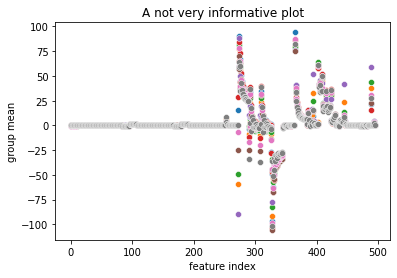

In [ ]:

for i in np.arange(0,8):
  sns.scatterplot(x = np.arange(0,496,1),
                  y =  Xy_gmeans2.iloc[i,:],
                  color = sns.color_palette("tab10")[i])
plt.title("A not very informative plot")
plt.xlabel("feature index")
plt.ylabel("group mean")

How to summarize these then? PCA /LDA below might be best bet


# PCA and LDA Projections for X_train

Text(0.5, 1.0, 'Cumulative Variance Explained by Principal Components')

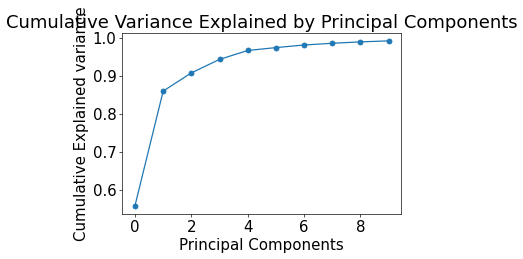

In [131]:
#obtain first k PCA's
k = 10
PC = PCA(n_components = k)
PC.fit(X_train)
PC.components_.T

#majority of variance in data explained by first PCs
plt.rcParams['figure.dpi'] = 60
plt.plot(np.cumsum(PC.explained_variance_ratio_), "o-")
plt.ylabel("Cumulative Explained variance")
plt.xlabel("Principal Components")
plt.title("Cumulative Variance Explained by Principal Components")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


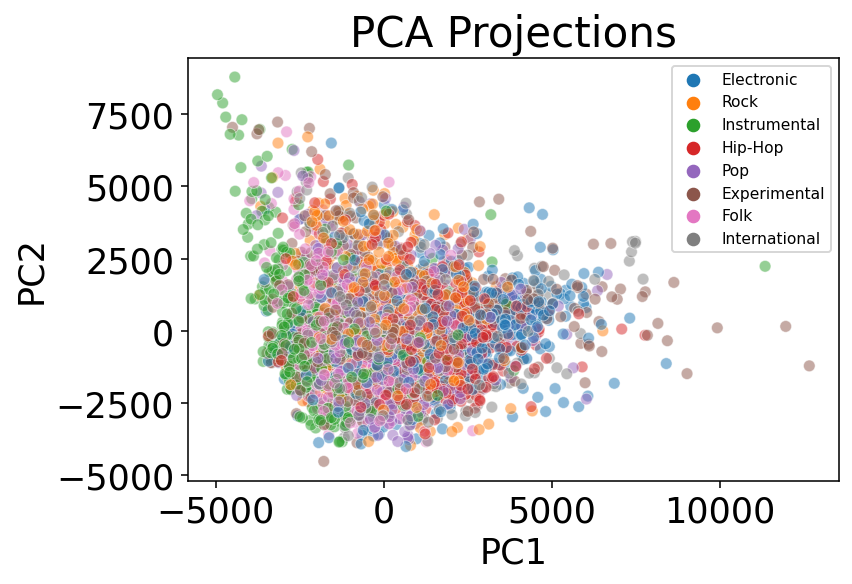

In [163]:
plt.rcParams['figure.dpi'] = 140
#obtain PCA projections
Z_PC = PC.transform(X_train)
sns.scatterplot(Z_PC[:,0],Z_PC[:,1], alpha = .5, hue = y_train)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projections")
plt.legend(loc = 0, prop={'size': 8})


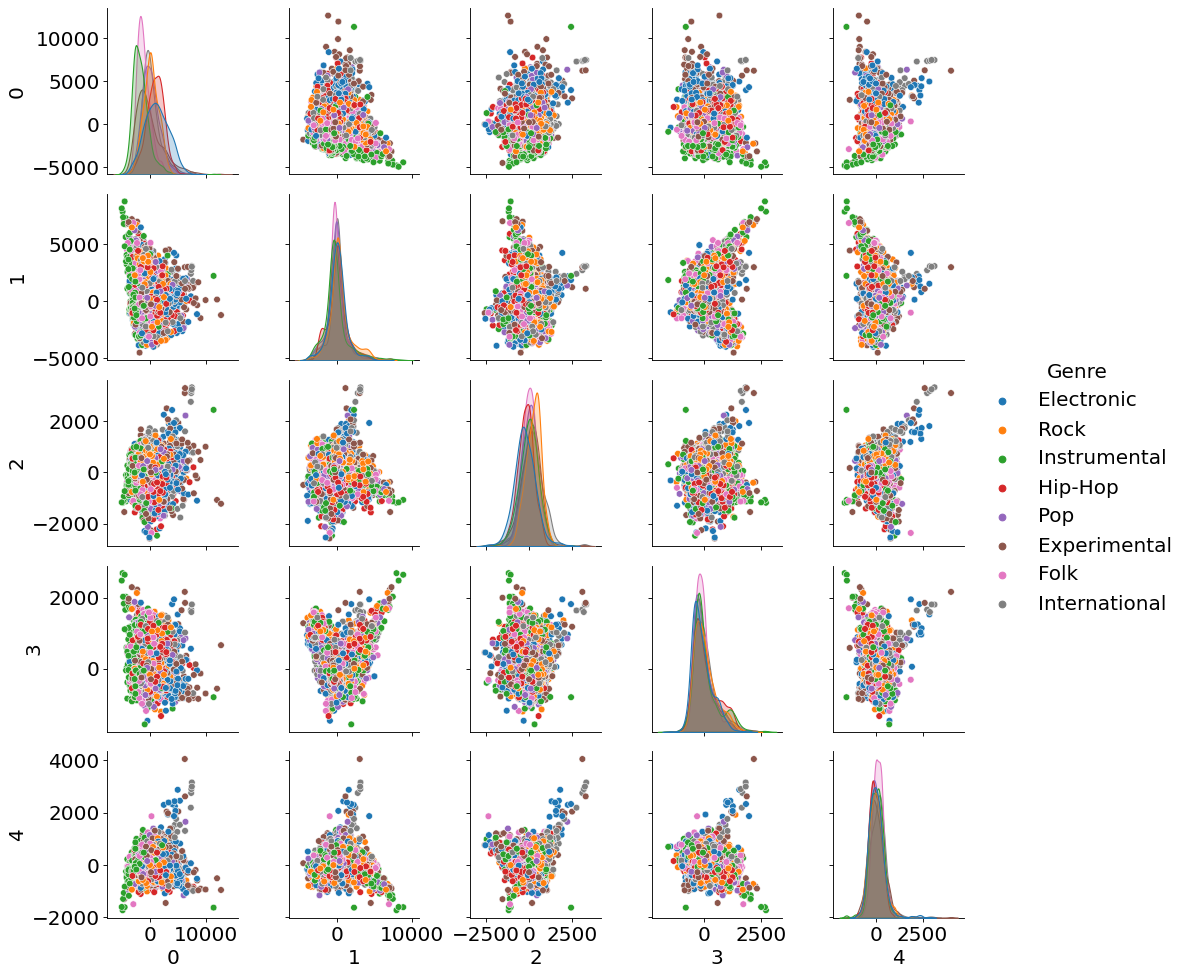

In [134]:
plt.rcParams['figure.dpi'] = 80
Z_PC2 = pd.concat([pd.DataFrame(Z_PC[:,0:5]), y_train], axis = 1)
sns.pairplot(Z_PC2, hue = 'Genre')

LDA projections instead - see better separation, as would expect

In [135]:
k = 7
LDA = LinearDiscriminantAnalysis(n_components = k) 
LDA.fit(X_train, y_train)
Z_LDA = LDA.transform(X_train)

#appears you can't add shrinkage if using it to transform

Some of the below plots have pretty good separation of the rock group

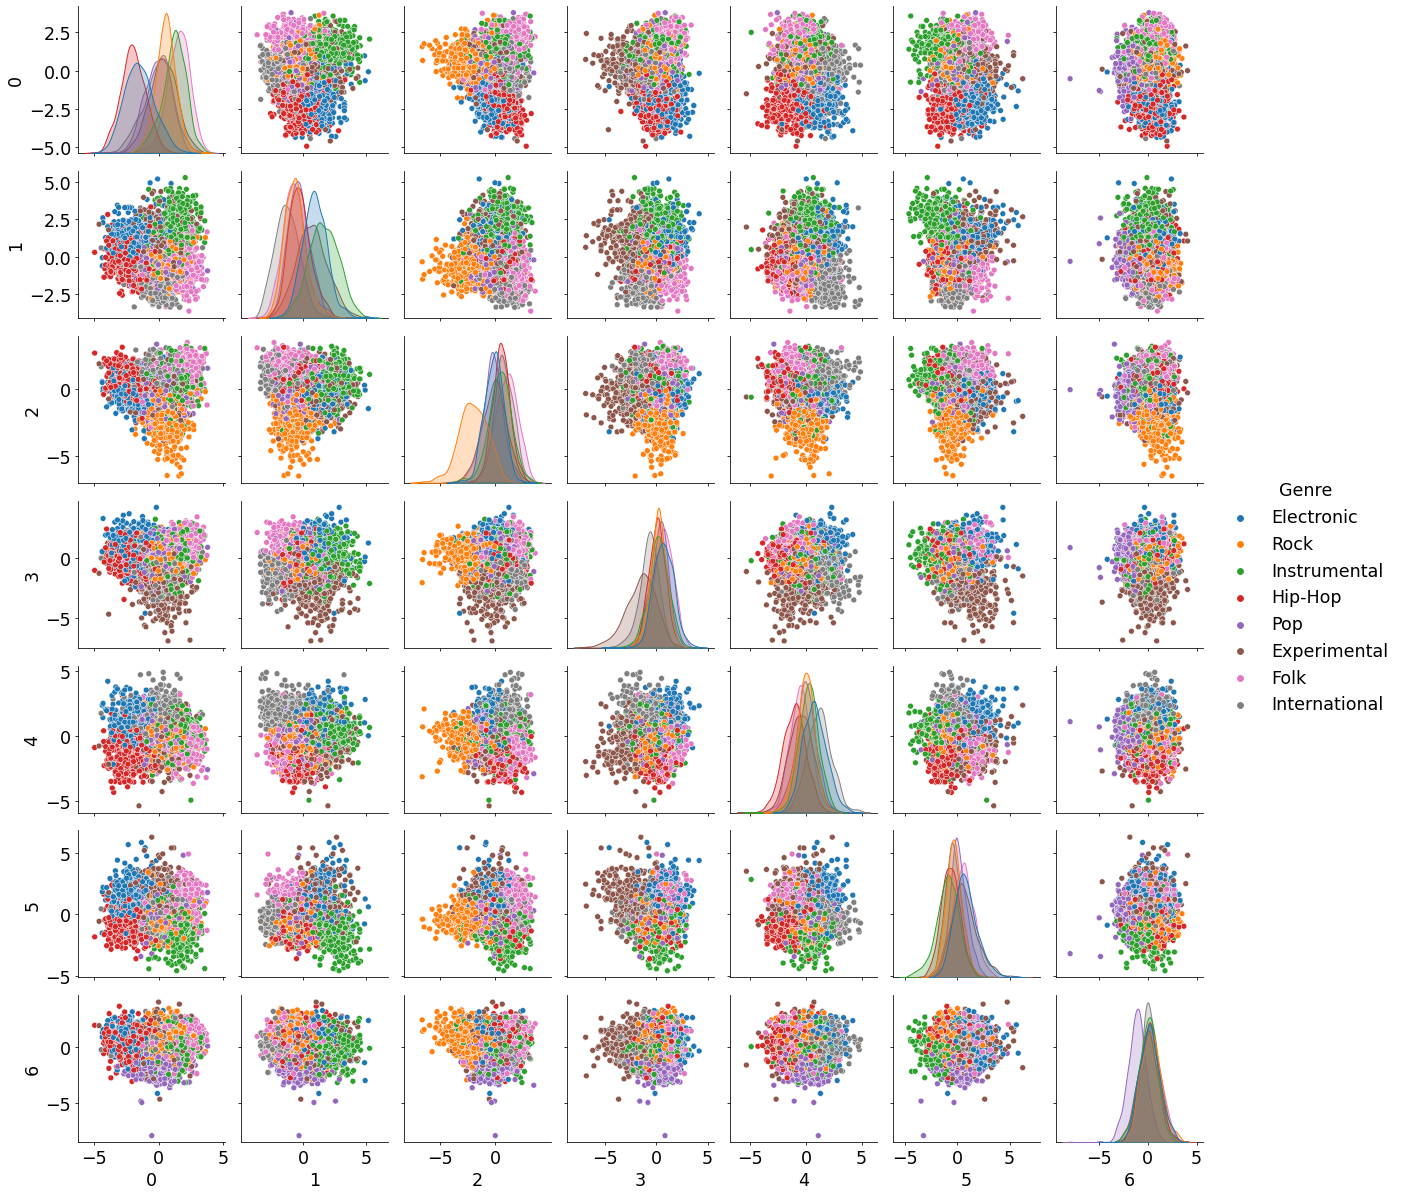

In [136]:
plt.rcParams['figure.dpi'] = 70 
Z_LDA2 = pd.concat((pd.DataFrame(Z_LDA), y_train), axis = 1)
sns.pairplot(Z_LDA2, hue = 'Genre')

Displaying two individually

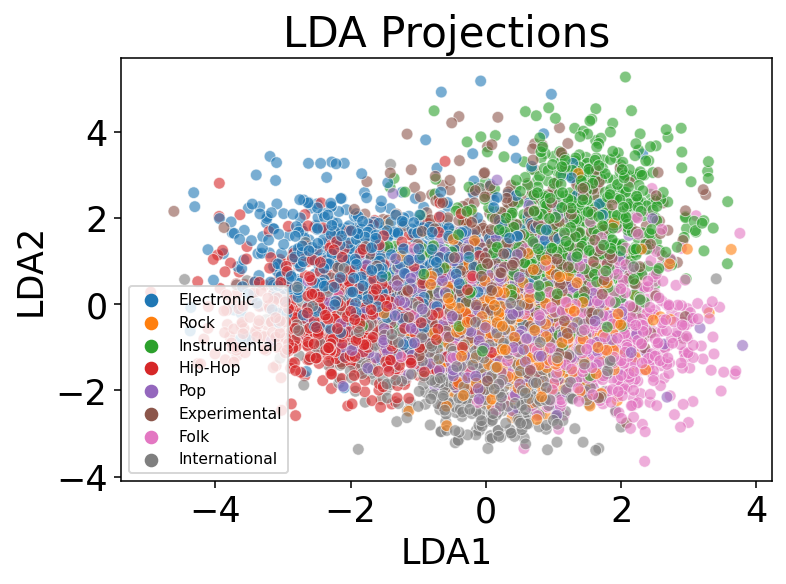

In [161]:
plt.rcParams['figure.dpi'] = 140
ax = plt.figure()
sns.scatterplot(x = Z_LDA[:,0],
                y = Z_LDA[:,1],
                alpha = .6,
                hue = y_train)
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.title("LDA Projections")
plt.legend(loc = 3, prop={'size': 8})
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3, fancybox=True, shadow=True)


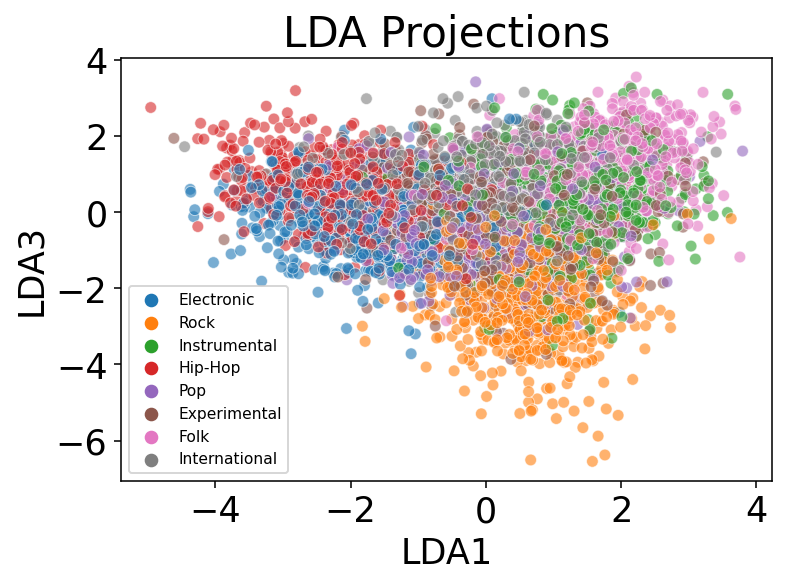

In [162]:
ax = plt.figure()
sns.scatterplot(x = Z_LDA[:,0],
                y = Z_LDA[:,2],
                alpha = .6,
                hue = y_train)
plt.xlabel("LDA1")
plt.ylabel("LDA3")
plt.title("LDA Projections")
plt.legend(loc = 3, prop={'size': 8})
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3, fancybox=True, shadow=True)


PCA for test data (for comparison)

* not much to see though because can't color the data by group
* but for what it's worth, shape is generally similar

In [ ]:
k = 10
PC = PCA(n_components = k)
PC.fit(X_test)
plt.rcParams['figure.dpi'] = 100 #make plot larger
#obtain PCA projections
Z_PC = PC.transform(X_test)
sns.scatterplot(x = Z_PC[:,0],y = Z_PC[:,1], alpha = .5)
plt.xlabel("PC1")
plt.ylabel("PC2")